<a href="https://colab.research.google.com/github/varunraghav/Econometric_Models/blob/main/Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective of the Project

Objective of the project is to perform a causal analysis of major macro-economic indicators affecting US housing prices.

I came across this dataset on kaggle, which got me inspired to start an analysis.

https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors/data

After going through the dataset, I found that many data in the dataset provided seem to be wrong, such as population. So I decided to extract data on my own from FRED API

# Macro-Economic Indicators Used:


1.   House Price Index(Target Variable)
2.   CPI
3. Unemployment Rate
4. Real GDP Growth Rate.
5. Nominal GDP
6. Mortgage Rate
7. Real Disposable Income.
8. Stock Price Index.
9. House Supply
10. Permits for New House
11. Population


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pip install fredapi

In [3]:
from fredapi import Fred
import pandas as pd


fred = Fred(api_key='0b2aff3aa3c85683a3890f2f82f6d162')

# Fetch data from FRED (since 1985 onwards)
start_date = '1985-01-01'

# Consumer Price Index (CPI) without housing
cpi_data = fred.get_series('CUSR0000SA0L2', start_date=start_date)

# Unemployment Rate
unemployment_data = fred.get_series('UNRATE', start_date=start_date)

# Real GDP Growth Rate (Quarterly)
real_gdp_growth_data = fred.get_series('A191RL1Q225SBEA', start_date=start_date)

# Nominal GDP Growth Rate (Quarterly)
nominal_gdp_data = fred.get_series('GDP', start_date=start_date)

# Mortgage Rate (30-Year Fixed Rate Mortgage)
mortgage_rate_data = fred.get_series('MORTGAGE30US', start_date=start_date)

# Real Disposable Income
real_disposable_income_data = fred.get_series('DSPIC96', start_date=start_date)

# House Price Index (S&P/Case-Shiller U.S. National Home Price Index)
house_price_index_data = fred.get_series('CSUSHPINSA', start_date=start_date)

# Stock Price Index (S&P 500 Index)
stock_price_index_data = fred.get_series('SP500', start_date=start_date)

# NASDAQ index
nasdaq_index_data = fred.get_series('NASDAQCOM', start_date=start_date)

# House Supply (Total Housing Inventory: All Houses For Sale)
house_supply_data = fred.get_series('HSN1F', start_date=start_date)

# Permits for New Houses (New Private Housing Units Authorized by Building Permits)
permits_new_houses_data = fred.get_series('PERMIT', start_date=start_date)

# Population (Total Population: All Ages including Armed Forces Overseas)
population_data = fred.get_series('POPTHM', start_date=start_date)

# Combine data into a DataFrame
data = pd.DataFrame({
    'CPI': cpi_data,
    'Unemployment Rate': unemployment_data,
    'Real GDP Growth Rate': real_gdp_growth_data,
    'Nominal GDP': nominal_gdp_data,
    'Mortgage Rate': mortgage_rate_data,
    'Real Disposable Income': real_disposable_income_data,
    'House Price Index': house_price_index_data,
    'Stock Price Index': stock_price_index_data,
    'Stock Price NASDAQ' : nasdaq_index_data,
    'House Supply': house_supply_data,
    'Permits for New Houses': permits_new_houses_data,
    'Population': population_data
})

# Create 'Year' and 'Month' columns from the index (which is the date)
data['Year'] = data.index.year
data['Month'] = data.index.month



In [4]:
data

,CPI,Unemployment Rate,Real GDP Growth Rate,Nominal GDP,Mortgage Rate,Real Disposable Income,House Price Index,Stock Price Index,Stock Price NASDAQ,House Supply,Permits for New Houses,Population,Year,Month
1946-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946,1
1946-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946,4
1946-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946,7
1946-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946,10
1947-01-01,23.2,NaN,NaN,243.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5815.03,18342.94,NaN,NaN,NaN,2024,10
2024-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5859.85,18502.69,NaN,NaN,NaN,2024,10
2024-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5815.26,18315.59,NaN,NaN,NaN,2024,10
2024-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5842.47,18367.08,NaN,NaN,NaN,2024,10


Data has been loaded from 1946 onwards despite instructions. So let's remove them and start from 1987 onwards.

1987 is chosen because Housing Price Index is available from this period.

Let's also remove 2024 data to keep it simple.

In [5]:
data = data[data['Year'] > 1986]
data = data[data['Year'] <2024]

In [6]:
data

,CPI,Unemployment Rate,Real GDP Growth Rate,Nominal GDP,Mortgage Rate,Real Disposable Income,House Price Index,Stock Price Index,Stock Price NASDAQ,House Supply,Permits for New Houses,Population,Year,Month
1987-01-01,109.5,6.6,3.0,4722.156,NaN,6494.2,63.734,NaN,NaN,709.0,1690.0,241857.0,1987,1
1987-01-02,NaN,NaN,NaN,NaN,9.37,NaN,NaN,NaN,353.26,NaN,NaN,NaN,1987,1
1987-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.19,NaN,NaN,NaN,1987,1
1987-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.02,NaN,NaN,NaN,1987,1
1987-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.49,NaN,NaN,NaN,1987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,12
2023-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4774.75,15074.57,NaN,NaN,NaN,2023,12
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4781.58,15099.18,NaN,NaN,NaN,2023,12
2023-12-28,NaN,NaN,NaN,NaN,6.61,NaN,NaN,4783.35,15095.14,NaN,NaN,NaN,2023,12


# Data Cleaning
Each indicator used have different frequencies.


1.   Mortgage Rate: Recorded weekly.
2.   S&P Stock Index: Available only from 2013 onwards due to an agreement between the Federal Reserve Bank of St. Louis and S&P Dow Jones Indices LLC.
3. NASDAQ Data: Available on a daily basis from 1987, therefore used as the Stock Index.
4. CPI, Unemployment Rate, Real Disposable Income, House Price Index, House Supply, New Permits, Population Data: Available on a monthly basis.
5. GDP Data: Available every quarter - January, April, August, and October.

Each indicator is standardized to create a monthly dataset. Monthly averages are taken for indicators available on a daily or weekly basis. For GDP data, which is available on a quarterly basis, values for the remaining months are interpolated using a linear fit.


In [7]:
data = data.drop('Stock Price Index', axis =1)

In [8]:
# Convert the index to datetime if not already
data.index = pd.to_datetime(data.index)

# Create a new column with month and year as combined datetime values for grouping
data['Year-Month'] = data.index.to_period('M')

# Group mortgage rate and NASDAQ index by 'Year-Month' and calculate the mean
mortgage_rate_monthly_avg = data.groupby('Year-Month')['Mortgage Rate'].mean()
nasdaq_monthly_avg = data.groupby('Year-Month')['Stock Price NASDAQ'].mean()

# Shift the 'Year-Month' by 1 to assign the monthly average to the next month
mortgage_rate_monthly_avg.index = mortgage_rate_monthly_avg.index.shift(1)
nasdaq_monthly_avg.index = nasdaq_monthly_avg.index.shift(1)

# Assign the next month's mortgage rate and NASDAQ index average to the first day of each month
data.loc[data.index.is_month_start, 'Mortgage Rate'] = data.loc[data.index.is_month_start, 'Year-Month'].map(mortgage_rate_monthly_avg)
data.loc[data.index.is_month_start, 'Stock Price NASDAQ'] = data.loc[data.index.is_month_start, 'Year-Month'].map(nasdaq_monthly_avg)

# Drop all non-first-day rows
data = data[data.index.is_month_start]

# Now drop the 'Year-Month' column as it's no longer needed
data = data.drop(columns=['Year-Month'])

In [9]:
data = data.dropna(subset = ['Mortgage Rate', 'Stock Price NASDAQ'])
data.rename(columns = {'Stock Price NASDAQ' : 'Stock Price Index NASDAQ'}, inplace = True)

<ipython-input-9-9476fc53c686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'Stock Price NASDAQ' : 'Stock Price Index NASDAQ'}, inplace = True)


In [10]:
data.isna().sum()

,0
CPI,0
Unemployment Rate,0
Real GDP Growth Rate,296
Nominal GDP,296
Mortgage Rate,0
Real Disposable Income,0
House Price Index,0
Stock Price Index NASDAQ,0
House Supply,0
Permits for New Houses,0


In [11]:
df_interpolated = data.copy()

In [12]:
df_interpolated ['Nominal GDP'] = df_interpolated ['Nominal GDP'].interpolate(method='linear')
df_interpolated ['Real GDP Growth Rate'] = df_interpolated ['Real GDP Growth Rate'].interpolate(method='linear')
df_interpolated = df_interpolated.dropna(subset = ['Mortgage Rate'])

df_interpolated = df_interpolated.dropna(subset=['Real GDP Growth Rate', 'Nominal GDP'])

## Data Transformation

Let's apply log on all independant variables except that have "Rate"

In [13]:
df_interpolated.loc[:, 'Log_CPI'] = np.log(df_interpolated['CPI'])
df_interpolated.loc[:, 'Log_Nominal_GDP'] = np.log(df_interpolated['Nominal GDP'])
df_interpolated.loc[:, 'Log_HPI'] = np.log(df_interpolated['House Price Index'])
df_interpolated.loc[:, 'Log_Real_Disposable_Income'] = np.log(df_interpolated['Real Disposable Income'])
df_interpolated.loc[:, 'Log_House_Supply'] = np.log(df_interpolated['House Supply'])
df_interpolated.loc[:, 'Log_Permits_for_New_Houses'] = np.log(df_interpolated['Permits for New Houses'])
df_interpolated.loc[:, 'Log_Population'] = np.log(df_interpolated['Population'])
df_interpolated.loc[:, 'Log_Stock_Price_Index'] = np.log(df_interpolated['Stock Price Index NASDAQ'])


# Explolatory Data Analysis(EDA)

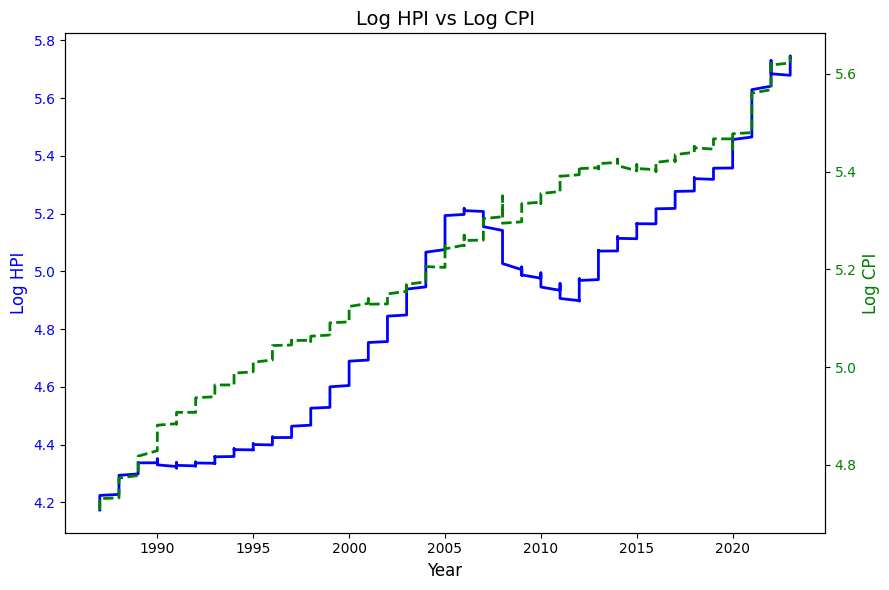

In [14]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Log CPI
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Log_CPI'], label='Log CPI', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Log CPI', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Log CPI', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


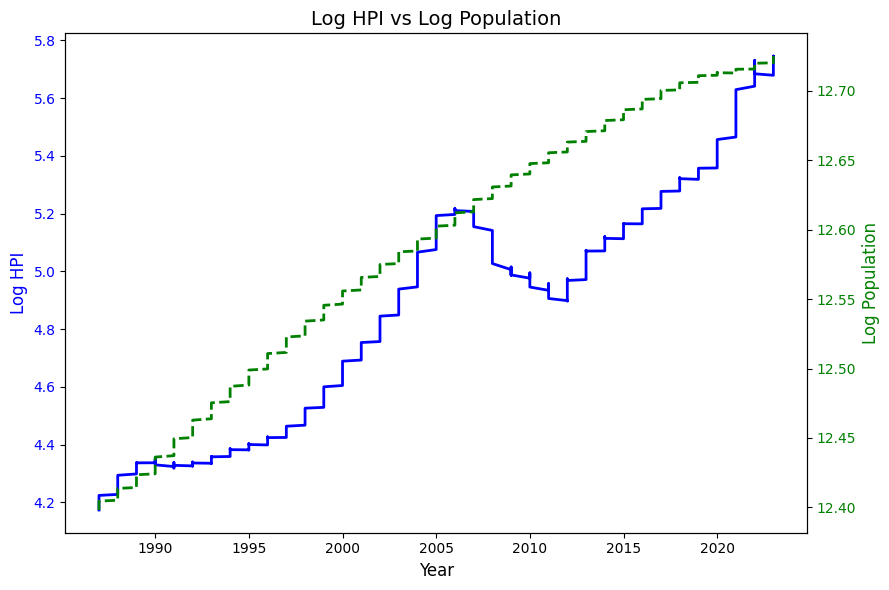

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Log Population
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Log_Population'], label='Log CPI', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Log Population', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Log Population', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


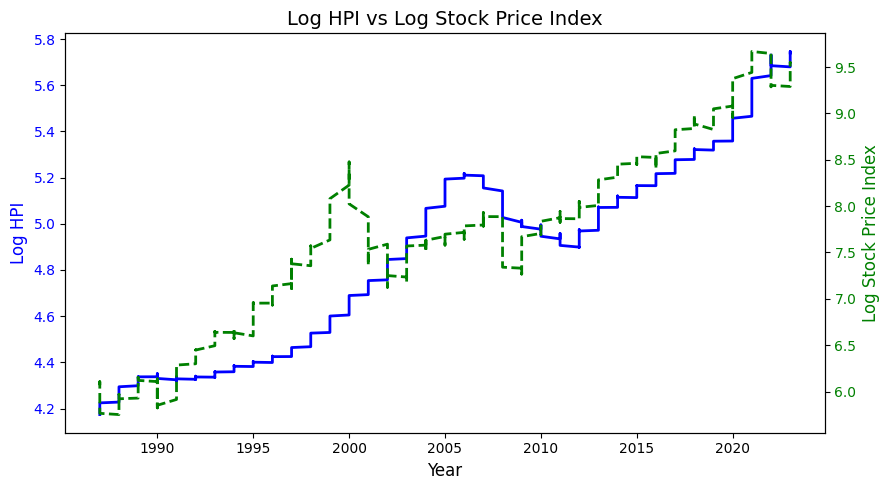

In [16]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Log Population
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Log_Stock_Price_Index'], label='Log Stock Price Index', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Log Stock Price Index', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Log Stock Price Index', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


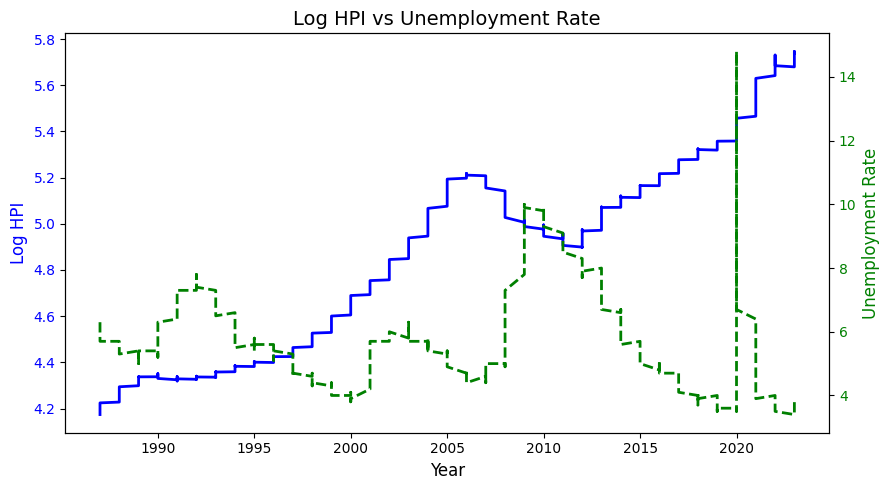

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Unemployment Rate
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Unemployment Rate'], label='Unemployment Rate', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Unemployment Rate', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Unemployment Rate', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


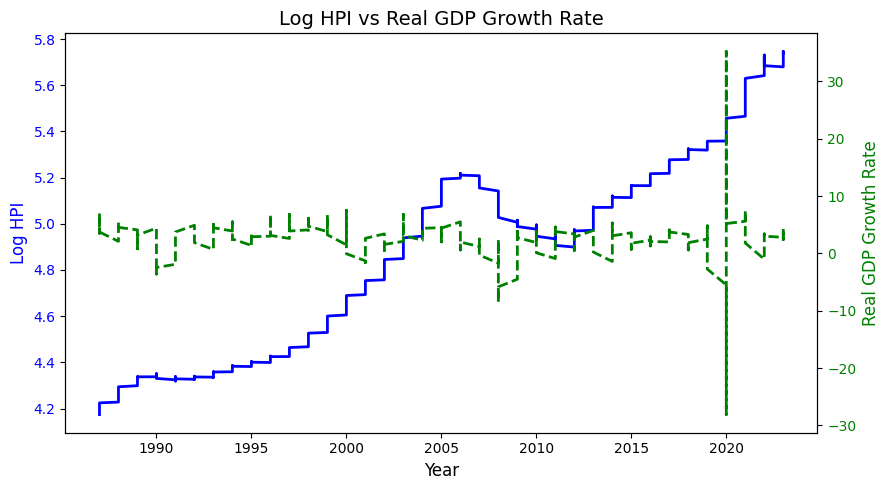

In [18]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Real GDP Growth Rate
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Real GDP Growth Rate'], label='Real GDP Growth Rate', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Real GDP Growth Rate', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Real GDP Growth Rate', fontsize=14)
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


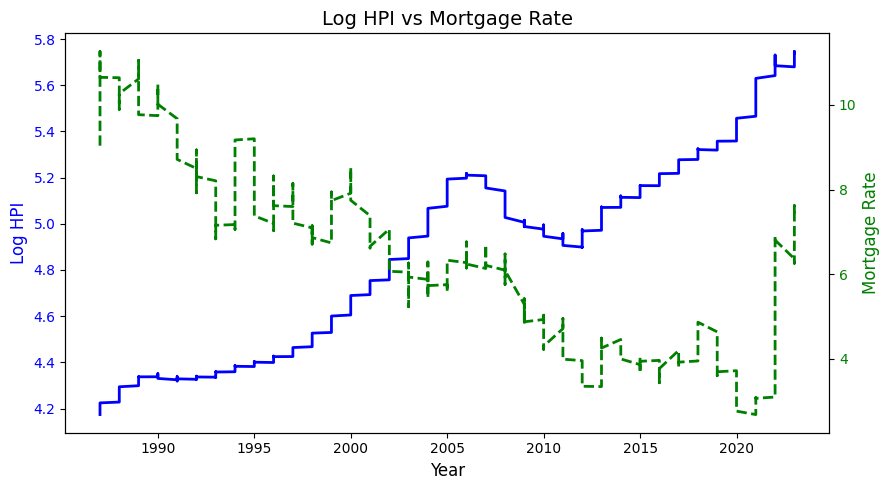

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Mortgage Rate
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Mortgage Rate'], label='Mortgage Rate', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Mortgage Rate', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Mortgage Rate', fontsize=14)
fig.tight_layout()
plt.show()


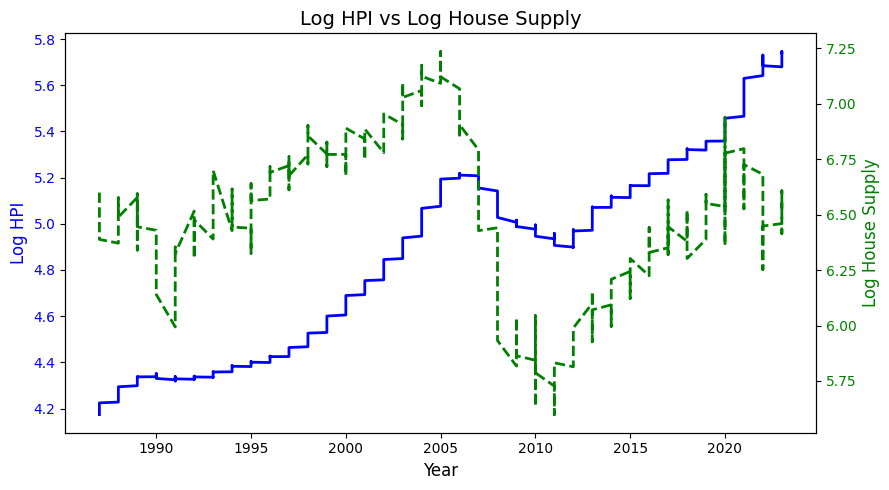

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Log House Supply
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Log_House_Supply'], label='Log House Supply', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Log House Supply', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Log House Supply', fontsize=14)
fig.tight_layout()
plt.show()


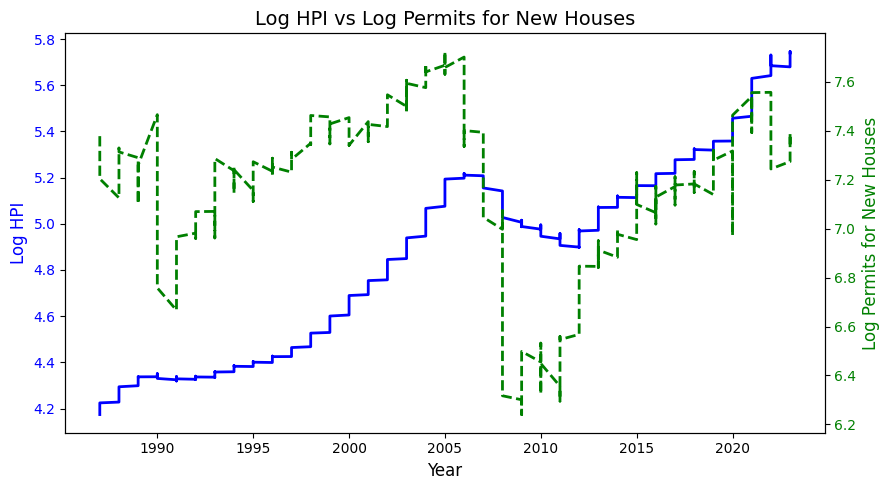

In [21]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot Log HPI on the primary y-axis
ax1.plot(df_interpolated['Year'], df_interpolated['Log_HPI'], label='Log HPI', color='blue', linewidth=2)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Log HPI', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Log Permits for New Houses
ax2 = ax1.twinx()
ax2.plot(df_interpolated['Year'], df_interpolated['Log_Permits_for_New_Houses'], label='Log Permits for New Houses', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Log Permits for New Houses', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Log HPI vs Log Permits for New Houses', fontsize=14)
fig.tight_layout()
plt.show()


# Model 1.1 - Simple Model with Log Transformed Terms

In [22]:
import statsmodels.api as sm
# Define dependent and independent variables (including log-transformed ones)
X = df_interpolated[['Log_CPI', 'Log_Nominal_GDP', 'Log_Real_Disposable_Income', 'Log_House_Supply', 'Log_Permits_for_New_Houses', 'Log_Stock_Price_Index','Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]
y = df_interpolated['Log_HPI']

# Add constant term
X = sm.add_constant(X)

model_interpolated = sm.OLS(y, X).fit()

# Display summary
print(model_interpolated.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_HPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4751.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:48:06   Log-Likelihood:                 788.48
No. Observations:                 441   AIC:                            -1555.
Df Residuals:                     430   BIC:                            -1510.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Checking for Multi-Collinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data.round(0))

                      Variable        VIF
0                        const  4117899.0
1                      Log_CPI      363.0
2              Log_Nominal_GDP     1308.0
3   Log_Real_Disposable_Income      316.0
4             Log_House_Supply        8.0
5   Log_Permits_for_New_Houses       12.0
6        Log_Stock_Price_Index       19.0
7               Log_Population      330.0
8            Unemployment Rate        5.0
9         Real GDP Growth Rate        1.0
10               Mortgage Rate       15.0


# Model 1.2 - Forward Selection

There is a need to remove some variables to avoid problem of multi-collinearity. Let's go by forward selection algorithm

In [24]:
import statsmodels.api as sm
import pandas as pd

# Define dependent and independent variables (including log-transformed ones)
X = df_interpolated[['Log_CPI', 'Log_Nominal_GDP', 'Log_Real_Disposable_Income', 'Log_House_Supply', 'Log_Permits_for_New_Houses',
                     'Log_Stock_Price_Index', 'Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]
y = df_interpolated['Log_HPI']

# Function for forward feature selection
def forward_selection(X, y, threshold_in=0.05):
    # Initialize empty list of selected variables
    included = []
    while True:
        changed = False
        # List of variables that are not yet included
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
        if not changed:
            break
    return included

# Perform forward selection
result = forward_selection(X, y)

# Build the final model with the selected features
X_selected = X[result]  # Get the selected features
X_selected = sm.add_constant(X_selected)  # Add constant term

# Fit the final model
final_model = sm.OLS(y, X_selected).fit()

# Display the summary of the final model
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                Log_HPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5288.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:48:26   Log-Likelihood:                 788.34
No. Observations:                 441   AIC:                            -1557.
Df Residuals:                     431   BIC:                            -1516.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### There are no signficant or note-worthy changes when Real Disposable Income is eliminated from Forward Selection algorithm

# Model 1.3 - Manually removing Nominal GDP too due to high VIF factor

In [25]:
X_13 = df_interpolated[['Log_CPI', 'Log_House_Supply', 'Log_Permits_for_New_Houses', 'Log_Stock_Price_Index','Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]
y_13 = df_interpolated['Log_HPI']

# Add constant term
X_13 = sm.add_constant(X_13)

model13 = sm.OLS(y_13, X_13).fit()

# Display summary
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_HPI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1218.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          6.16e-291
Time:                        21:48:31   Log-Likelihood:                 445.73
No. Observations:                 441   AIC:                            -873.5
Df Residuals:                     432   BIC:                            -836.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# 1.4 Removing Population as well

In [26]:
X = df_interpolated[['Log_CPI', 'Log_House_Supply', 'Log_Permits_for_New_Houses', 'Log_Stock_Price_Index', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]
y = df_interpolated['Log_HPI']

# Add constant term
X = sm.add_constant(X)

model14 = sm.OLS(y, X).fit()

# Display summary
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_HPI   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1110.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          5.15e-272
Time:                        21:48:54   Log-Likelihood:                 397.60
No. Observations:                 441   AIC:                            -779.2
Df Residuals:                     433   BIC:                            -746.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Checking for Hetereoscedacity for Model 1.3( best model)


In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Running the Breusch-Pagan test
bp_test = het_breuschpagan(model13.resid, model13.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 83.0264692122373, 'p-value': 1.2000077218204286e-14, 'f-value': 12.524471649047634, 'f p-value': 3.31691568927563e-16}


The p-value associated with the Lagrange Multiplier statistic is < 0.01, which is much lower than the typical significance level of 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis of homoscedasticity (constant variance of the residuals).

The f p-value is < 0.01, which is again lower than 0.05, providing further evidence that heteroscedasticity is present.

Correcting Heteroscedacsticity
To correct for heteroscedasticity, we can use Huber-White robust standard errors, also known as heteroscedasticity-consistent standard errors (HCSE). These standard errors adjust for the heteroscedasticity in the model while still using OLS for estimation.

HC0, HC1, HC2, and HC3 are different methods of computing.

We are proceeding with HC3

In [28]:
# Re-fit the model with robust standard errors (Huber-White/HC3)
robust_model = sm.OLS(y_13, X_13).fit(cov_type='HC3')

# Display the summary with robust standard errors
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_HPI   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1629.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          3.65e-317
Time:                        21:49:08   Log-Likelihood:                 445.73
No. Observations:                 441   AIC:                            -873.5
Df Residuals:                     432   BIC:                            -836.7
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

THERE IS NO SIGNIFICANT CHANGES AT ALL!

## Plotting ACF, PACF to check for Autoregression, Moving Averages


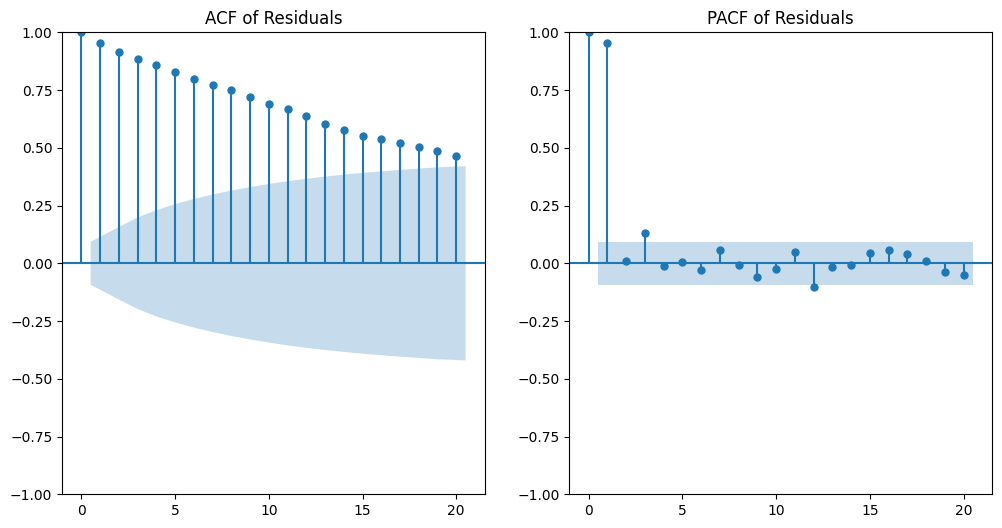

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the residuals of the OLS model
residuals = robust_model.resid

# Plot ACF and PACF of the residuals
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(122)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

plt.show()

This seems to be AR(1) model as ACF values are steadily decreasing, PACF shows spike at lag(1) and a sharp drop after that.


# 2.1 ARIMA Model

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Define the endogenous variable (Log_HPI) and exogenous variables (other predictors)
y_arima = df_interpolated['Log_HPI']
X_exog = df_interpolated[['Log_CPI', 'Log_House_Supply', 'Log_Permits_for_New_Houses', 'Log_Stock_Price_Index','Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]

# Fit an ARIMA(1,0,1) model with exogenous variables
arima_model = ARIMA(y_arima, exog=X_exog, order=(1, 0, 0)).fit()

# Print the summary of the ARIMA model
print(arima_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Log_HPI   No. Observations:                  441
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1361.499
Date:                Fri, 18 Oct 2024   AIC                          -2700.998
Time:                        21:49:27   BIC                          -2656.019
Sample:                    04-01-1987   HQIC                         -2683.255
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -60.5574      4.239    -14.287      0.000     -68.865     -52.250
Log_CPI                        0.4106      0.132      3.120      0.002       0.153 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
# Calculate fitted values from the ARIMA model
y_fitted = arima_model.fittedvalues

# Calculate R-squared manually
rss = np.sum((y_arima - y_fitted) ** 2)  # Residual sum of squares
tss = np.sum((y_arima - np.mean(y_arima)) ** 2)  # Total sum of squares
r_squared = 1 - (rss / tss)
print('R-squared:', r_squared)


R-squared: 0.9990006135495434


The AIC and BIC of the ARIMA model are significantly lower than in the OLS model, indicating that the ARIMA model fits the data better overall.
The log-likelihood of the ARIMA model (1339.242) is also much higher than in OLS models, suggesting a better fit.

Coefficients:

1. CPI (Inflation): Both models show a positive relationship with housing prices, but the effect is stronger in the OLS model , 1.6 compared to 1.2 in the ARIMA model.

2. Population: The effect of population is larger in the ARIMA model (3.1895) compared to OLS (2.7). Both models show a positive and significant effect.

3. Stock Price Index: The negative relationship between stock prices and housing prices is consistent across both models, but the ARIMA model shows a slightly smaller negative impact (-0.1290 vs. -0.1548 in OLS).

4. GDP Growth: Both models show a small negative and significant impact of GDP growth on house prices, but the effect is slightly smaller in the ARIMA model.
5. Mortgage Rates: The impact of mortgage rates is not significant in the ARIMA model, whereas it was sometimes significant but small in OLS models.
Autocorrelation:

#### Autocorrelation. -
The ARIMA model explicitly includes an AR(1) term (0.9662), which helps address autocorrelation in the data, an issue that was problematic in the OLS models (as evidenced by the low Durbin-Watson statistics in OLS).

The OLS models did not correct for this issue, leading to concerns about serial correlation in the residuals.

The OLS models did not handle heteroskedasticity well, while the ARIMA model seems to handle this better based on the diagnostics.

## Applying ADF Test to test for stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

# Apply Augmented Dickey-Fuller test to check stationarity
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Test for stationarity for each series
adf_test(df_interpolated['Log_HPI'])
adf_test(df_interpolated['Log_CPI'])
adf_test(df_interpolated['Log_Stock_Price_Index'])
adf_test(df_interpolated['Log_Population'])
adf_test(df_interpolated['Log_House_Supply'])
adf_test(df_interpolated['Log_Permits_for_New_Houses'])

ADF Statistic: 0.3951498763183218
p-value: 0.9813126558682647
ADF Statistic: -1.1856156258720072
p-value: 0.6797526971933097
ADF Statistic: -0.49927187406816875
p-value: 0.8921585071840643
ADF Statistic: -3.6390921846269135
p-value: 0.0050561761838631425
ADF Statistic: -2.1405011584427673
p-value: 0.22854368049593604
ADF Statistic: -1.503592916123507
p-value: 0.5317332318230692


## Applying differencing

In [33]:
# Apply first differencing to non-stationary variables in df_interpolated
df_interpolated['Diff_Log_HPI'] = df_interpolated['Log_HPI'].diff()
df_interpolated['Diff_Log_CPI'] = df_interpolated['Log_CPI'].diff()
df_interpolated['Diff_Log_Stock_Price_Index'] = df_interpolated['Log_Stock_Price_Index'].diff()
df_interpolated['Diff_Log_House_Supply'] = df_interpolated['Log_House_Supply'].diff()
df_interpolated['Diff_Log_Permits_for_New_Houses'] = df_interpolated['Log_Permits_for_New_Houses'].diff()

# Drop NaN values that are introduced after differencing
df_interpolated.dropna(inplace=True)


# Model 3.1 Differenced Model

In [34]:
X_13_diff = df_interpolated[['Diff_Log_CPI', 'Diff_Log_House_Supply', 'Diff_Log_Permits_for_New_Houses', 'Diff_Log_Stock_Price_Index','Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate']]
y_13_diff = df_interpolated['Diff_Log_HPI']

# Add constant term
X_13_diff = sm.add_constant(X_13_diff)

model13_diff = sm.OLS(y_13_diff, X_13_diff).fit()

# Display summary
print(model13_diff.summary())

                            OLS Regression Results                            
Dep. Variable:           Diff_Log_HPI   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     10.05
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           7.07e-13
Time:                        21:49:44   Log-Likelihood:                 1599.8
No. Observations:                 440   AIC:                            -3182.
Df Residuals:                     431   BIC:                            -3145.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     


# 3.2 Detrended Model

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to detrend a series
def detrend(series):
    X = np.arange(len(series)).reshape(-1, 1)  # Create a time index
    y = series.values.reshape(-1, 1)  # Values of the series

    # Fit a linear regression model to the data
    model = LinearRegression()
    model.fit(X, y)

    # Predict the trend (linear component)
    trend = model.predict(X)

    # Subtract the trend from the original series to detrend it
    detrended_series = series - trend.flatten()

    return detrended_series

# Detrend the relevant log-transformed variables
df_interpolated['Detrended_Log_HPI'] = detrend(df_interpolated['Log_HPI'])
df_interpolated['Detrended_Log_CPI'] = detrend(df_interpolated['Log_CPI'])
df_interpolated['Detrended_Log_Stock_Price_Index'] = detrend(df_interpolated['Log_Stock_Price_Index'])
df_interpolated['Detrended_Log_House_Supply'] = detrend(df_interpolated['Log_House_Supply'])
df_interpolated['Detrended_Log_Permits_for_New_Houses'] = detrend(df_interpolated['Log_Permits_for_New_Houses'])


# Optional: Drop NaNs if needed
df_interpolated.dropna(inplace=True)

# Now use the detrended variables in your OLS regression
X_detrended = df_interpolated[['Detrended_Log_CPI', 'Detrended_Log_House_Supply', 'Detrended_Log_Stock_Price_Index', 'Log_Population', 'Unemployment Rate', 'Real GDP Growth Rate', 'Mortgage Rate', 'Detrended_Log_Permits_for_New_Houses']]
y_detrended = df_interpolated['Detrended_Log_HPI']

# Add constant term
X_detrended = sm.add_constant(X_detrended)

# Fit the OLS model
model_detrended = sm.OLS(y_detrended, X_detrended).fit()

# Display summary
print(model_detrended.summary())


                            OLS Regression Results                            
Dep. Variable:      Detrended_Log_HPI   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.13e-98
Time:                        23:07:13   Log-Likelihood:                 534.70
No. Observations:                 440   AIC:                            -1051.
Df Residuals:                     431   BIC:                            -1015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# Final Model

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Define the endogenous variable (Log_HPI) and exogenous variables (other predictors)
y_arima = y_detrended
# Remove the constant term from X_exog
X_exog = X_detrended.drop(columns=['const'])  # Remove the 'const' column

# Fit an ARIMA(1,0,1) model with exogenous variables
arima_model = ARIMA(y_arima, exog=X_exog, order=(1, 0, 0)).fit()

# Print the summary of the ARIMA model
print(arima_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Detrended_Log_HPI   No. Observations:                  440
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1351.943
Date:                Fri, 18 Oct 2024   AIC                          -2681.887
Time:                        23:07:14   BIC                          -2636.932
Sample:                    05-01-1987   HQIC                         -2664.152
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -16.7352      1.205    -13.886      0.000     -19.097     -14.373
Detrended_Log_CPI                        0.6142      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
# Calculate fitted values from the ARIMA model
y_fitted = arima_model.fittedvalues

# Calculate R-squared manually
rss = np.sum((y_arima - y_fitted) ** 2)  # Residual sum of squares
tss = np.sum((y_arima - np.mean(y_arima)) ** 2)  # Total sum of squares
r_squared = 1 - (rss / tss)
print('R-squared:', r_squared)

R-squared: 0.9843982919836787
